In [1]:
import numpy as np
# from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [148]:
df = pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/data_2018.csv')
df

,YEAR,STATEFIP,METRO,AGE,SEX,RACE,MARST,VETSTAT,CITIZEN,HISPAN,...,VOTEHOW,VOTEWHEN,VOREGHOW,VOTED,VOREG,VOSUPPWT,MARRSIMPLE,RACESIMPLE,HISPSIMPLE,EDUSIMPLE
0,2018,1,2,48,2,200,4,1,1,0,...,1,1,5,2,99,1957.3134,2,2,0,2
1,2018,1,2,53,2,200,4,1,1,0,...,1,1,3,2,99,1687.7836,2,2,0,3
2,2018,1,2,20,2,200,6,1,1,0,...,1,1,3,2,99,2678.8328,3,2,0,3
3,2018,1,2,61,1,200,1,2,1,0,...,1,1,5,2,99,1753.9945,1,2,0,3
4,2018,1,2,62,2,200,1,1,1,0,...,1,1,97,2,99,1778.5886,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72999,2018,56,4,69,1,100,1,2,1,0,...,1,1,97,2,99,256.5947,1,1,0,4
73000,2018,56,4,60,2,100,1,1,1,0,...,1,1,97,2,99,226.8820,1,1,0,5
73001,2018,56,4,30,1,100,6,1,1,0,...,1,1,97,2,99,313.3757,3,1,0,6
73002,2018,56,4,56,1,100,6,2,1,0,...,1,2,7,2,99,265.6089,3,1,0,4


In [154]:
df["Age Band"] = pd.cut(df["AGE"], 5, labels=["18-32", "32-44", "44-58", "58-72", "72-85"]) #CREATE AGE BAND FEATURE

# Voter Registration Analysis (Part A)

In [22]:
df["VOYNOTREG"].value_counts()

99    60955
6      5379
9      2249
1      1432
4       737
2       508
7       476
3       462
97      456
5       204
96      133
98       13
Name: VOYNOTREG, dtype: int64

First, we will drop the 99 (not in universe) because these individuals did register and vote. We are interested in seeing who the people were **who did not vote, and why**.

In [84]:
nvdf = df[df["VOYNOTREG"] != 99] #not voted df

## One thing we can look it is, for each age group, what is the most popular reason for not voting ?

In [85]:
whyNotVoteBasedOnAge = nvdf[["Age Band", "VOYNOTREG"]].groupby("Age Band").agg(pd.Series.mode)
whyNotVoteBasedOnAge.rename(columns={'VOYNOTREG': "Most popular reason for not registering to vote"}, inplace=True)
whyNotVoteBasedOnAge.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnAge

,Most popular reason for not registering to vote
Age Band,
18-32,Not interested in politics or the election
32-44,Not interested in politics or the election
44-58,Not interested in politics or the election
58-72,Not interested in politics or the election
72-85,Not interested in politics or the election


The most popular reason for not registering to vote *across all age bands* was **Not being interested in the election or politics**. So, the reason for not registering to vote did not vary across ages.

## Next, did the most popular reason that voters did not register vary across sex ?

In [86]:
nvdf.loc[df.SEX == 1, "SEX"] = "Male"
nvdf.loc[df.SEX == 2, "SEX"] = "Female"

In [87]:
whyNotVoteBasedOnSex = nvdf[["SEX", "VOYNOTREG"]].groupby("SEX").agg(pd.Series.mode)
whyNotVoteBasedOnSex.rename(columns={'VOYNOTREG': "Most popular reason for not registering to vote"}, inplace=True)
whyNotVoteBasedOnSex.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnSex

,Most popular reason for not registering to vote
SEX,
Female,Not interested in politics or the election
Male,Not interested in politics or the election


The most popular reason for not registering to vote **did not vary across genders**. Both most males and most females said they did not register to vote because they were not interested in the election or politics.

## Finally, look at the most popular reason for why people did not register to vote across RACE

# Voter Turnout Analysis: (Part B)

# VOTED 

# How many people voted ?

In [90]:
df["VOTED"].value_counts()

2    48337
1    24667
Name: VOTED, dtype: int64

In [91]:
df.loc[df.VOTED == 1, "VOTED"] = 0

In [92]:
df.loc[df.VOTED == 2, "VOTED"] = 1

Above, we simply change the VOTED values to binary values (0 for didn't vote, 1 for did vote) to make it easier for us to compute averages.

In [6]:
df["VOTED"].value_counts()

1    48337
0    24667
Name: VOTED, dtype: int64

Doing a value count on the VOTED column tells us that most people voted (~66%). Now what we can do is try to see for each age from 18-80, the percentage of individuals of that age that voted.

# What ages voted the most and the least ?

In [8]:
df["Age Band"].value_counts()

44-58    17280
58-72    16648
32-44    14627
18-32    14313
72-85    10136
Name: Age Band, dtype: int64

In [9]:
ageVotes = df[["Age Band", "VOTED"]].groupby(["Age Band"], as_index=False).mean().sort_values(by="VOTED",  ascending=False)

In [10]:
ageVotes.set_index("Age Band", drop=True, inplace=True)

Text(0.5, 1.0, 'Votership by Age Group')

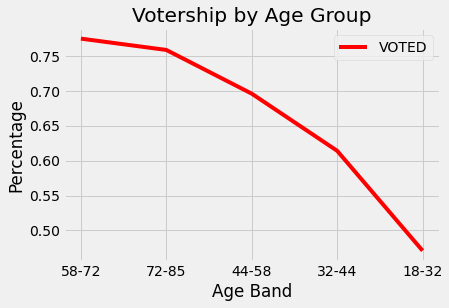

In [114]:
ageVotesGraph = ageVotes.plot(color="red")
ageVotesGraph.set_ylabel("Percentage")
ageVotesGraph.set_title("Votership by Age Group")

**As we can see from the above graph, those in the age range of 58 to 72 had the highest votership of almost 80%, whereas those in the age of 18 to 32 had the lowest voter turnout**

# How does votership break down by race ?

In [12]:
df["RACE"].value_counts()

100    60827
200     7012
651     2810
300      908
802      447
652      268
801      257
803      205
805       51
804       51
810       44
809       38
813       34
806       13
812       11
808        5
814        5
817        5
807        3
811        3
816        3
815        2
820        1
830        1
Name: RACE, dtype: int64

We can already see that we have a large pool of values for the RACE feature that makes analysis tedious. To simplify our analysis, we will clean our data to focus on the following races: White (100), Black (200), Asian (651, 652) and Native American (300), and more than one race (801-830). Note that we can also use the RACESIMPLE feature to get this information without doing any further work, but for demonstration purposes, we will try cleaning the data ourselves. We will create this information in a column called *NEWRACE*.

In [13]:
df["NEWRACE"] = df["RACE"]
df["NEWRACE"] = df["NEWRACE"].replace([100], "White")
df["NEWRACE"] = df["NEWRACE"].replace([200], "Black")
df["NEWRACE"] = df["NEWRACE"].replace([651, 652], "Asian or Pacific Islander")
df["NEWRACE"] = df["NEWRACE"].replace([300], "Native American")
df["NEWRACE"] = df["NEWRACE"].replace([801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 830], "More than one race")

In [14]:
raceVotes = df[["NEWRACE", "VOTED"]].groupby(["NEWRACE"], as_index=False).mean().sort_values(by="VOTED", ascending=False)
raceVotes.rename(columns={"NEWRACE": "RACE"}, inplace=True) #rename NEWRACE to clear ambigiouity
raceVotes.set_index("RACE", drop=True, inplace=True)
raceVotes

,VOTED
RACE,
Black,0.672847
White,0.670031
More than one race,0.604750
Asian or Pacific Islander,0.558155
Native American,0.475771


<AxesSubplot:xlabel='RACE'>

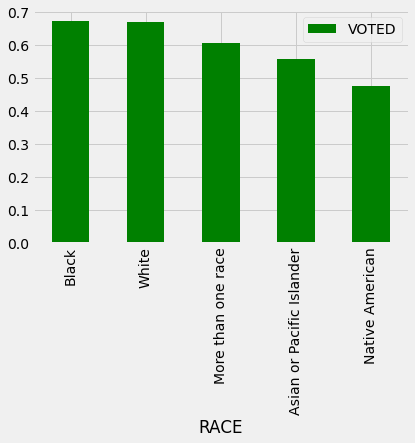

In [15]:
raceVotes.plot.bar(color="green")

**We can conclude from our analysis of race that those who or Black and White are equally as likely to vote, each voting at about a 68% rate. Native Americans are the least likely to vote, with less than half of all Native Americans voting. Asian Americans also fall behind in votership, with 45% of their population abstaining from the polls. Those who hail from a background of more than one race are more likely to vote than Asian and Native Americans, but less likely than Black or White people.**

## What does votership look like when considering Hispanic/Non-Hispanic ?

As a corollary to race, we should also look at how many of those with a Hispanic background did not vote, as they are historically under-educated, and thus I predict their votership numbers are down in comparison to Non-Hispanics. 0 = Non-Hispanics, 1 = Hispanics

In [16]:
df["HISPSIMPLE"].value_counts()

0    66371
1     6633
Name: HISPSIMPLE, dtype: int64

In [17]:
hispVotes = df[["HISPSIMPLE", "VOTED"]].groupby(["HISPSIMPLE"], as_index=False).mean()
hispVotes.rename(columns={"HISPSIMPLE": "Hispanic Ethnicity", "VOTED": "Voted"}, inplace=True)
hispVotes.replace([0], "Not Hispanic", inplace=True)
hispVotes.replace([1], "Hispanic", inplace=True)
hispVotes.set_index("Hispanic Ethnicity", drop=True, inplace=True)
hispVotes

,Voted
Hispanic Ethnicity,
Not Hispanic,0.675280
Hispanic,0.530378


<AxesSubplot:xlabel='Hispanic Ethnicity'>

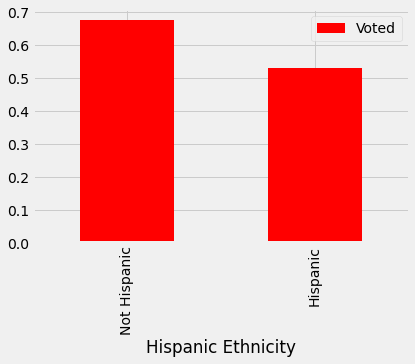

In [18]:
hispVotes.plot.bar(color="red")

**As I predicted, Hispanics were (14%) less likely to vote than their Non-Hispanic counterparts**

# VOTEWHEN

In [156]:
df["VOTEWHEN"].value_counts()

1     30524
99    24667
2     17543
97      149
96       88
98       33
Name: VOTEWHEN, dtype: int64

In [160]:
vwdf = df[df["VOTEWHEN"] < 3] # create a new dataframe from the original dataframe and assign it to a variable so we dont modify the original dataset. 
#Get all the data for those that voted on election day OR before election date.

In [158]:
vwdf["VOTEWHEN"].value_counts()

1    30524
2    17543
Name: VOTEWHEN, dtype: int64

## How does when an individual voted differ by age ?

In [159]:
vwdf[["Age Band", "VOTEWHEN"]].groupby(["Age Band"]).agg(pd.Series.mode)

,VOTEWHEN
Age Band,
18-32,1
32-44,1
44-58,1
58-72,1
72-85,1


Across all age groups, **most people voted on the day of the election.**

## How does when an individual voted differ by race ?

# Voting by Education (Part C)

In [19]:
df["EDUSIMPLE"].value_counts()

2    20722
5    16018
3    13586
4     7809
6     6884
1     5436
7     2449
0      100
Name: EDUSIMPLE, dtype: int64

In [20]:
df["NEWEDU"] = df["EDUSIMPLE"]
df["NEWEDU"].replace(0, "No School", inplace=True)
df["NEWEDU"].replace(1, "Some school, no diploma", inplace=True)
df["NEWEDU"].replace(2, "GED", inplace=True)
df["NEWEDU"].replace(3, "Some college, no degree", inplace=True)
df["NEWEDU"].replace(4, "Associate", inplace=True)
df["NEWEDU"].replace(5, "Bachelors", inplace=True)
df["NEWEDU"].replace(6, "Masters", inplace=True)
df["NEWEDU"].replace(7, "Doctorate", inplace=True)
eduVotes = df[["NEWEDU", "VOTED"]].groupby(["NEWEDU"], as_index=False).mean().sort_values(by="VOTED", ascending=False)
eduVotes.rename(columns={"NEWEDU": "Level of Education", "VOTED": "Voted"}, inplace=True)
eduVotes.set_index("Level of Education", drop=True, inplace=True)
eduVotes

,Voted
Level of Education,
Doctorate,0.870559
Masters,0.854736
Bachelors,0.795293
Associate,0.693687
"Some college, no degree",0.653467
GED,0.543143
"Some school, no diploma",0.368837
No School,0.270000


<AxesSubplot:xlabel='Level of Education'>

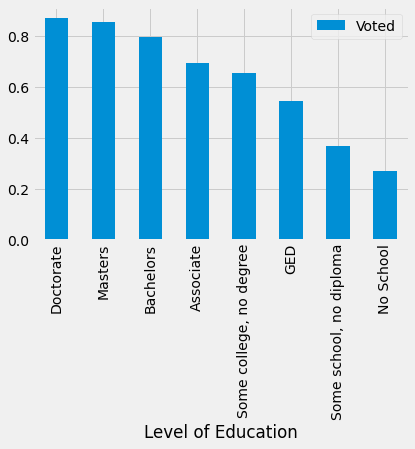

In [147]:
eduVotes.plot.bar()

**As the level of education increases, voter turnout increases.**

# Voting by State (Part D)

In [93]:
df[["STATEFIP", "VOTED"]].groupby(["STATEFIP"]).mean().sortby()

,VOTED
STATEFIP,
1,0.645930
2,0.686869
4,0.706587
5,0.582866
6,0.687127
8,0.791771
9,0.666667
10,0.661593
11,0.720840
